**Проект "сервис аренды самокатов GoFast"**

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

План работы:
- Загрузка и предпросмотр данных
- Оценка общей информации данных
- Предобработка данных
- Проведение исследовательского анализа данных
- Объединение данных и подсчёт выручки
- Проверка гипотез
- Общий вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.
- Пользователи — users_go.csv
- Поездки — rides_go.csv
- Подписки — subscriptions_go.csv

#### Шаг 1. Загрузка данных

In [2]:
#Считаем данные users_go.csv
data_user = pd.read_csv('/datasets/users_go.csv')
data_user.head(10)
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [3]:
#Считаем данные rides_go.csv
data_rider = pd.read_csv('/datasets/rides_go.csv')
data_rider.head(10)
data_rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [4]:
#Считаем данные subscriptions_go.csv
data_sub = pd.read_csv('/datasets/subscriptions_go.csv')
data_sub.head(10)
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод:**
data_user - типы данных соответсвуют содержанию, пропущенные значения отсутствуют. data_rider - в данных отсутсвуют пропущенные значения, колонка date имеет тип object - исправим в предобработке данных. data_sub - с данными всё в порядке.

#### Шаг 2. Предобработка данных

**2.1 Приведите столбец date к типу даты pandas.**

In [5]:
data_rider['date'] = pd.to_datetime(data_rider['date'], format='%Y-%m-%d')
data_rider.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

**2.2 Создайте новый столбец с номером месяца на основе столбца date.**

In [6]:
data_rider['month'] = pd.DatetimeIndex(data_rider['date']).month
data_rider.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.**

In [7]:
#проверяем наличие пропущенных значений в data_user
data_user.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [8]:
#проверяем наличие пропущенных значений в data_rider
data_rider.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [9]:
#проверяем наличие пропущенных значений в data_sub
data_sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [10]:
#проверим наличие дубликатов data_user
data_user.duplicated().sum()

#удалим дубликаты
data_user = data_user.drop_duplicates()

In [11]:
#проверим наличие дубликатов data_rider
data_rider.duplicated().sum()

0

In [12]:
#проверим наличие дубликатов data_sub
data_sub.duplicated().sum()

0

**Вывод:** привели столбец date к типу даты pandas. Создали новый столбец с номером месяца на основе столбца date. Пропусков в данных нет. Дубликаты удалены.

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках

In [13]:
data_user.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


In [14]:
data_rider.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


In [15]:
data_sub.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


**3.1 частота встречаемости городов;**

Text(0.5, 0, 'Названия городов')

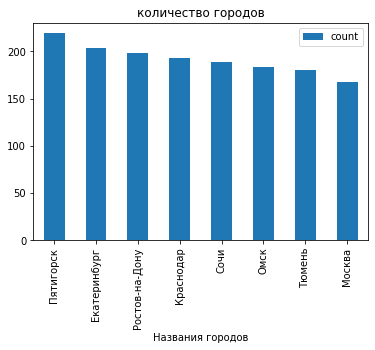

In [16]:
df_city = data_user['city'].value_counts().reset_index()
df_city.columns = ['city', 'count']
df_city.plot.bar(x='city', y='count')
plt.title('количество городов')
plt.xlabel('Названия городов')

In [17]:
df_city

,city,count
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


**Вывод:** Больше всего пользователей самокатов в городе Пятигорск и Екатеринбург, меньше всего в Москве.

**3.2 соотношение пользователей с подпиской и без подписки;**

In [18]:
#выведем количество пользователей по каждой из подписок
data_user['subscription_type'].value_counts()

#переведем количесто в процентное соотношение
data_user['subscription_type'].value_counts(normalize=True)

free     0.544329
ultra    0.455671
Name: subscription_type, dtype: float64

<AxesSubplot:ylabel='subscription_type'>

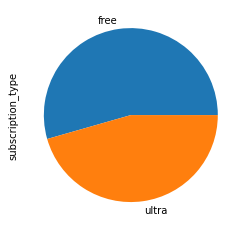

In [19]:
data_user.groupby(by='subscription_type')['subscription_type'].count().plot(kind='pie')

**Вывод:** как видим - пользователей без подписки немного больше тех, у кого подключена подписка ultra. Без подписок 54% пользователей, с подпиской ultra 46% пользователей.

**3.3 возраст пользователей**

Text(0, 0.5, 'Количество пользователей')

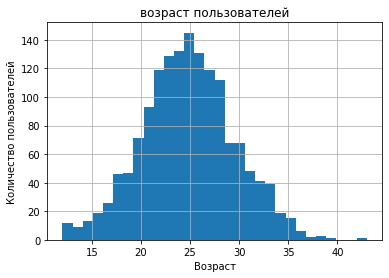

In [20]:
data_user['age'].hist(bins=30)
plt.title('возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

**Вывод:** Пользователи в возрасте 25 лет больше всего пользуются услугами самокатов. Пользователи, в диапазонах до 20ти и от 30ти лет, меньше пользуются услугами самокатов.

**3.4 расстояние, которое пользователь преодолел за одну поездку;**

Text(0.5, 1.0, 'Расстояние')

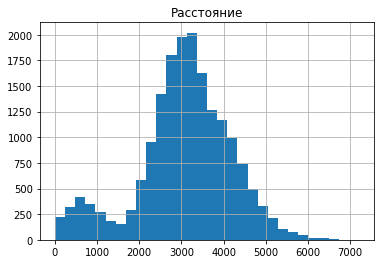

In [21]:
data_rider['distance'].hist(bins=30)
plt.title('Расстояние')

**Вывод:** как мы видим - самое большое расстояние, которое пользователь преодолел за одну поездку - примерно 3000 метро. 

**3.5 продолжительность поездок.**

Text(0.5, 1.0, 'Продолжительность поездки')

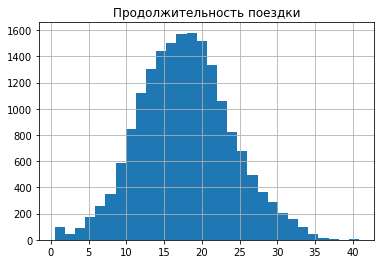

In [22]:
data_rider['duration'].hist(bins=30)
plt.title('Продолжительность поездки')

**Вывод:** В среднем, продолжительность поездки находится в диапазоне от 15 до 20 минут.

**Итоговый вывод:** Больше всего пользователей самокатов в городе Пятигорск и Екатеринбург, меньше всего в Москве. Пользователей без подписок 54%, с подпиской ultra 46%. Пользователи в возрасте 25 лет больше всего пользуются услугами самокатов. Самое большое расстояние, которое пользователь преодолел за одну поездку - примерно 3000 метро. 

#### Шаг 4. Объединение данных

**4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм.** 

In [23]:
#объединим данные data_user, data_rider и data_sub в один датафрейм
data12 = pd.merge(data_user, data_rider, on='user_id')
data = pd.merge(data12, data_sub, on='subscription_type')
data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


**4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:**

- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [24]:
data_ultra = data.query("subscription_type == 'ultra'")
data_free = data.query("subscription_type == 'free'")

**4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.**

Text(0.5, 0, 'Расстояние, м.')

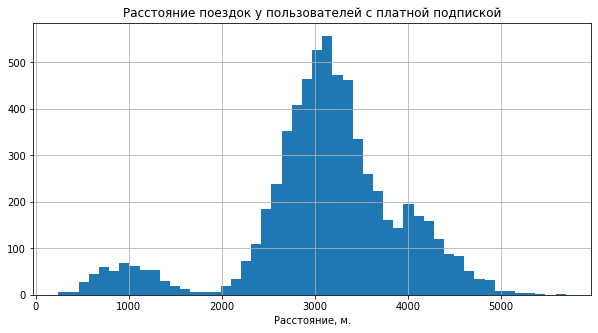

In [25]:
#расстояние поездок пользователей с подпиской ultra
data_ultra['distance'].hist(bins=50, figsize = (10,5))
plt.title('Расстояние поездок у пользователей с платной подпиской')
plt.xlabel('Расстояние, м.')

In [26]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Text(0.5, 0, 'Время, м.')

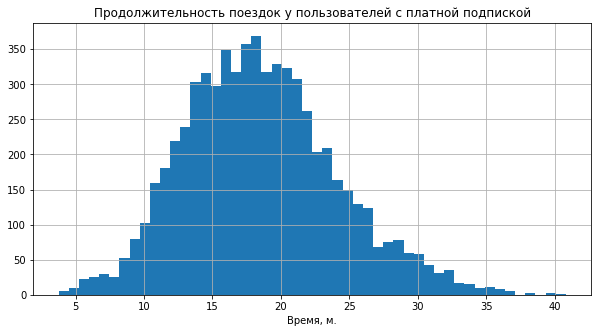

In [27]:
#продолжительность поездок пользователей с подпиской ultra
data_ultra['duration'].hist(bins=50, figsize = (10,5))
plt.title('Продолжительность поездок у пользователей с платной подпиской')
plt.xlabel('Время, м.')

In [28]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Text(0.5, 0, 'Расстояние, м.')

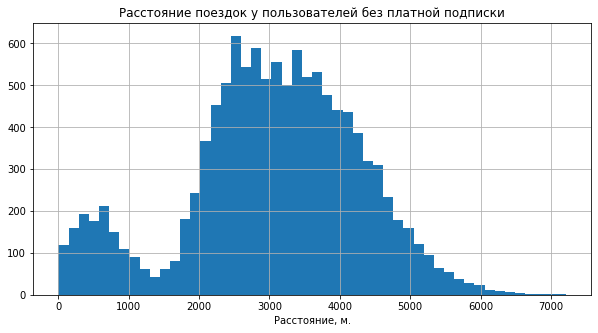

In [29]:
#расстояние поездок пользователей с бесплатной подпиской 
data_free['distance'].hist(bins=50, figsize = (10,5))
plt.title('Расстояние поездок у пользователей без платной подписки')
plt.xlabel('Расстояние, м.')

In [30]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

Text(0.5, 0, 'Время, м.')

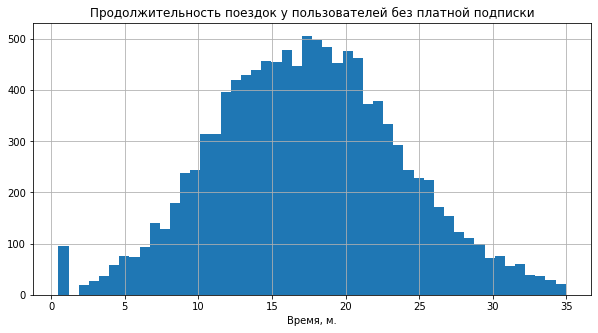

In [31]:
#продолжительность поездок пользователей с бесплатной подпиской 
data_free['duration'].hist(bins=50, figsize = (10,5))
plt.title('Продолжительность поездок у пользователей без платной подписки')
plt.xlabel('Время, м.')

In [32]:
data_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

**Вывод:** объединили данные о пользователях, поездках и подписках в один датафрейм. Создали ещё два датафрейма c данными о пользователях без подписки и с подпиской. В ходе визуализации информации о расстоянии и времени поездок для пользователей обеих категорий определили, что средняя дистанция почти одинаковая - 3115 и 3045 метров, а среднее продолжительности также схоже - 18 и 17 минут.

#### Шаг 5. Подсчёт выручки

**5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [33]:
#для подсчёта стоимости округлим до следующего целого числа
import numpy as np

data['duration'] = np.ceil(data['duration'])

data_proceeds = data.pivot_table(index=['user_id', 'month'], values = ['distance', 'duration', 'name', 'subscription_type'], aggfunc={'distance':'sum', 'duration':'sum', 'name':'count', 'subscription_type': 'min'})

data_proceeds = data_proceeds.rename(columns = {'name':'count'})
data_proceeds.head(10)

distance  duration  count subscription_type
user_id month                                                 
1       1       7027.511294      42.0      2             ultra
        4        754.159807       7.0      1             ultra
        8       6723.470560      46.0      2             ultra
        10      5809.911100      32.0      2             ultra
        11      7003.499363      56.0      3             ultra
        12      6751.629942      28.0      2             ultra
2       3      10187.723006      63.0      3             ultra
        4       6164.381824      40.0      2             ultra
        6       3255.338202      14.0      1             ultra
        7       6780.722964      48.0      2             ultra

**5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь.**

Помесячная выручка считается по формуле: 
стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

In [34]:
#помесячная выручка для пользователей с подпиской ultra
data_proceeds.loc[data_proceeds['subscription_type'] == 'ultra', 'proceeds'] = (6 * data_proceeds['duration']) + 199

#помесячная выручка для пользователей с подпиской free
data_proceeds.loc[data_proceeds['subscription_type'] == 'free', 'proceeds'] =  (50 * data_proceeds['count']) + (8 * data_proceeds['duration'])

data_proceeds

distance  duration  count subscription_type  proceeds
user_id month                                                           
1       1       7027.511294      42.0      2             ultra     451.0
        4        754.159807       7.0      1             ultra     241.0
        8       6723.470560      46.0      2             ultra     475.0
        10      5809.911100      32.0      2             ultra     391.0
        11      7003.499363      56.0      3             ultra     535.0
...                     ...       ...    ...               ...       ...
1534    6       3409.468534      26.0      2              free     308.0
        8       7622.453034      48.0      2              free     484.0
        9       4928.173852      23.0      1              free     234.0
        11     13350.015305      78.0      4              free     824.0
        12      2371.711192      16.0      1              free     178.0

[11331 rows x 5 columns]

**Вывод:** Создали датафрейм с агрегированными данными о поездках и нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также Добавили столбец с помесячной выручкой для пользователей с подпиской и без.

#### Шаг 6. Проверка гипотез

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**

Визуализируя информацию о расстоянии и времени поездок для пользователей обеих категорий, мы определили, что пользователи с подпиской тратят в среднем 18 минут, в то время, как пользователи без подписки тратят на минуту меньше - 17 минут. Следовательно пользователи с подпиской ultra выгоднее. Осталось проверить гипотезу. 

Нулевая гипотеза - пользователи с подпиской ultra тратят столько же времени, сколько и пользователи без подписки.

Альтернативная гипотеза - пользователи с подпиской ultra тратят больше времени, чем пользователи без подписки.

In [35]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative = 'greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве.')
else:
    print('Не можем отвергнуть нулевую гипотезу о равенстве.')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу о равенстве.


**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.**

Визуализируя информацию о расстоянии и времени поездок для пользователей обеих категорий, мы определили, что пользователи с подпиской ultra проезжают в среднем 3115 метров, в то время, как пользователи без подписки проезжают меньше - 3045 метров. Следовательно пользователи с подпиской ultra не превышают оптимальное расстояние, как и пользователи без подписки. Осталось проверить гипотезу. 

Нулевая гипотеза - пользователи с подпиской ultra проезжают расстояние равное 3130 метров.

Альтернаттивная гипотеза - пользователи с подпиской ultra проезжают меньше оптимального расстояния в 3130 метров.

In [36]:
optim = 3130
alfa = 0.05

results = st.ttest_1samp(data_ultra['distance'], optim, alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.08046311521502146
Не отвергаем нулевую гипотезу


**6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.**

In [37]:
data_proceeds.loc[data_proceeds['subscription_type'] == 'ultra']['proceeds'].describe()

count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: proceeds, dtype: float64

In [38]:
data_proceeds.loc[data_proceeds['subscription_type'] == 'free']['proceeds'].describe()

count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: proceeds, dtype: float64

Исходя из данных, мы видим, что в среднем в месяц пользователи с подпиской ultra тратя 361р, в то время как пользователи без подписки тратя 325р, что на 36р меньше. Следовательно пользователи с подпиской ultra выгоднее. Осталось проверить гипотезу. 

Нулевая гипотеза - пользователи с подпиской ultra приносят столько же выручки, скольки и пользователи без подписки.

Альтернативная гипотеза - пользователи с подпиской ultra приносят больше выручки, чем пользователи без подписки.

In [39]:
alfa = 0.05

results = st.ttest_ind(data_proceeds.loc[data_proceeds["subscription_type"] == 'ultra']['proceeds'], data_proceeds.loc[data_proceeds["subscription_type"] == 'free']['proceeds'], alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу.


**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Поскольку мы будем иметь дело с двумя зависимыми выборками и будет проверяться гипотеза о равенстве среднего значения генеральной совокупности до и после изменения для проверки этой гипотезы нам бы понадобился тест scipy.stats.ttest_rel. Аргументами были бы наборы данных — парные выборки до и после изменения.

**Общий вывод:**

В ходе данного проекта мы:
- Считали данные
- Сделали предобработку данных
- Провели исследовательский анализ
- Объеденили данные
- Подсчитали выручку
- Проверили ряд гипотез

В ходе проекта мы привели столбец date к типу даты pandas, создали новый столбец с номером месяца на основе столбца date, обработали пропуски и дубликаты. Выяснили, что больше всего пользователей самокатов в городе Пятигорск и Екатеринбург, меньше всего в Москве. Пользователи в возрасте 25 лет больше всего пользуются услугами самокатов. Самое большое расстояние, которое пользователь преодолел за одну поездку - примерно 3000 метро.

В ходе визуализации информации о расстоянии и времени поездок для пользователей обеих категорий определили, что средняя дистанция почти одинаковая - 3115 и 3045 метров, а среднее продолжительности также схоже - 18 и 17 минут.Создали датафрейм с агрегированными данными о поездках и нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также Добавили столбец с помесячной выручкой для пользователей с подпиской и без.

Исходя из данных можно сказать, что число пользователей с подпиской ultra и без подписки не сильно отличаются. Но пользователи с подпиской приносят прибыли больше и пользуются самокатами чуть чаще.